In [1]:
# 데이터 불러오기
# 데이터를 배치 형태로 만드는 법과 데이터를 전처리하는 방법에 대해 알아보기

In [2]:
import torch
import torchvision # 이미지와 관련된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# tr.Compose 내에 원하는 전처리를 차례대로 넣어주면 된다.
transf = tr.Compose([tr.Resize(16), tr.ToTensor()]) # 예시 : 16x16 으로 이미지 크기 변환 후 텐서 타입으로 변환
# 원본 이미지의 너비, 높이가 다를 경우 각각 지정해줘야함 ; tr.Resize((16, 16))

# torchvision.datasets 에서 제공하는 CIFAR10 데이터를 불러오기 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
# root : 다운로드 받을 경로
# train = True : 학습 데이터 불러오기, False : 테스트 데이터 불러오기
# transform = transf : 미리 선언한 전처리 사용하기 

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# 데이터셋 크기
print(trainset[0][0].size())

# 데이터셋 = 이미지와 라벨이 동시에 들어있는 튜플 형태
# trainset[0] : 학습 데이터의 첫 번째 데이터 ; 이미지 한 장과 라벨 숫자 하나가 저장되어 있음
# trainset[0][0] : 이미지 , trainset[0][1] : 라벨
# 이미지 사이즈 3 x 16 x 16 ; 3 : 채널수, 16x16 : 이미지의 너비와 높이 의미
# 컬러 사진은 RGB 이미지이므로 채널이 3개

torch.Size([3, 16, 16])


In [5]:
# DataLoader : 데이터를 미니 배치 형태로 만들어준다. 배치 데이터에 관한 배치 사이즈 및 셔플 여부 선택 가능
trainloader = DataLoader(trainset, batch_size=50, shuffle=True) 
testloader = DataLoader(testset, batch_size=50, shuffle=False)
# batch_size=50, shuffle=True : 무작위로 데이터를 섞어 한 번에 50개의 이미지를 묶은 배치로 제공

In [6]:
len(trainloader)
# CIFAR10 의 학습 이미지는 50000 장이고 배치 사이즈가 50장 -> 배치의 개수 : 1000

1000

In [7]:
# 배치 이미지 확인
images, labels = iter(trainloader).next() # iter, next 함수 이용해 trainloader 첫 번째 배치 불러오기
print(images.size()) # 배치 사이즈 ; (배치 크기) x (채널 수) x (너비) x (높이) 의미

torch.Size([50, 3, 16, 16])


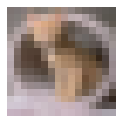

In [8]:
oneshot = images[1].permute(1, 2, 0).numpy()
# image[1] 크기 : (3, 16, 16)
# 그림을 그려주기 위해서는 채널 수가 가장 뒤로 가는 형태 (16, 16, 3) 으로 변형해야함 -> permute(1, 2, 0)
# permute(1, 2, 0) 은 기존 차원의 위치인 (0, 1, 2) 를 (1, 2, 0) 으로 바꾸는 함수
# 마지막으로 numpy() 로 넘파이 배열로 변환

plt.figure(figsize=(2, 2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

In [9]:
# 같은 클래스 별로 폴더를 정리한 경우

# 데이터가 같은 클래스 별로 미리 폴더를 정리한 경우, ImageFolder 하나로 개인 데이터 사용 가능
# 폴더 별로 자동 라벨링 -> 별도로 라벨링 할 필요 없음
# 마지막으로 ImageFolder 에 상위 폴더 ./class 를 입력하면 이미지와 라벨이 정리되어 데이터를 불러온다

In [11]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor()])
trainset = torchvision.datasets.ImageFolder(root='./class', transform=transf)
trainloader = DataLoader(trainset, batch_size=1, shuffle=False)

In [ ]:
# 정리되지 않은 커스텀 데이터 불러오기

# ImageFolder 를 이용하면 매우 간단하게 이미지 데이터를 사용할 수 있지만 여러 가지 이유로 사용 불가능한 경우
# 1. 라벨 별로 폴더 정리가 되어 있으면 매우 좋겠지만 그렇지 않은 경우가 많다
# 2. 정리를 하고 싶지만 다른 작업들과 공유된 데이터인 경우 폴더를 함부로 정리할 수 없다
# 3. 이미지 데이터라도 이미지가 아닌 텍스트, 리스트, 배열 등의 다른 형대로 저장되어 있는 경우도 있다

In [ ]:
# 커스텀 데이터 불러오기 기본 형태

from torch.utils.data import Dataset

class classname(Dataset): # Dataset 을 상속받아 DataLoader 에서 배치 단위로 불러올 수 있게 해준다

    def __init__(self):
        pass
    def __getitem__(self, index): # DaataLoader 를 통해 샘플이 요챙되면 __getitem__ 은 인덱스에 해당하는 샘플을 찾아서 준다
        pass
    def __len__(self): # __len__ 은 크기를 반환한다
        pass

In [12]:
# 커스텀 데이터 세트 예시
# 32x32 크기인 RGB 컬러 이미지 100장과 그에 대한 라벨이 되어있고 넘파이 배열로 정리가 되어 있다고 가정

train_images = np.random.randint(256, size=(100, 32, 32, 3))/255
train_labels = np.random.randint(2, size=(100, 1))

class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data) # 데이터를 텐서로 변환
        self.x_data = self.x_data.permute(0, 3, 1, 2) # 이미지 크기 (100, 32, 32, 3) -> (100, 3, 32, 32) 로 변환
        self.y_data = torch.LongTensor(y_data) # 데이터를 텐서로 변환
        self.len = self.y_data.shape[0] # 입력 데이터의 개수에 대한 변수 self.len 생성
    
    def __getitem__(self, index): # 뽑아낼 데이터에 대해 인덱스 처리
        return self.x_data[index], self.y_data[index]

    def __len__(self): # 미리 선언한 self.len 반환
        return self.len

In [13]:
# TensorData 클래스를 train_data 로 정의하여 DataLoader 에 넣어 배치 데이터 형태로 사용 가능
train_data = TensorData(train_images, train_labels)
train_loder = DataLoader(train_data, batch_size=10, shuffle=True)